In [170]:
import numpy as np
import pandas as pd
import fynance as fy
from matplotlib import pyplot as plt
import seaborn as sns

import torch
#import torch.nn

plt.style.use("seaborn")

In [31]:
# Set time axis
T = 525600  # = 365d * 24H * 60M
t_idx = np.arange(T)

# Set random sample
s = 5
m = 2
X = np.random.randn(T) * s + m

In [32]:
# Set parameters 
b = np.ones(T) 
a = np.ones(T)

/home/arthur/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/arthur/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/arthur/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/arthur/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/arthur/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts o

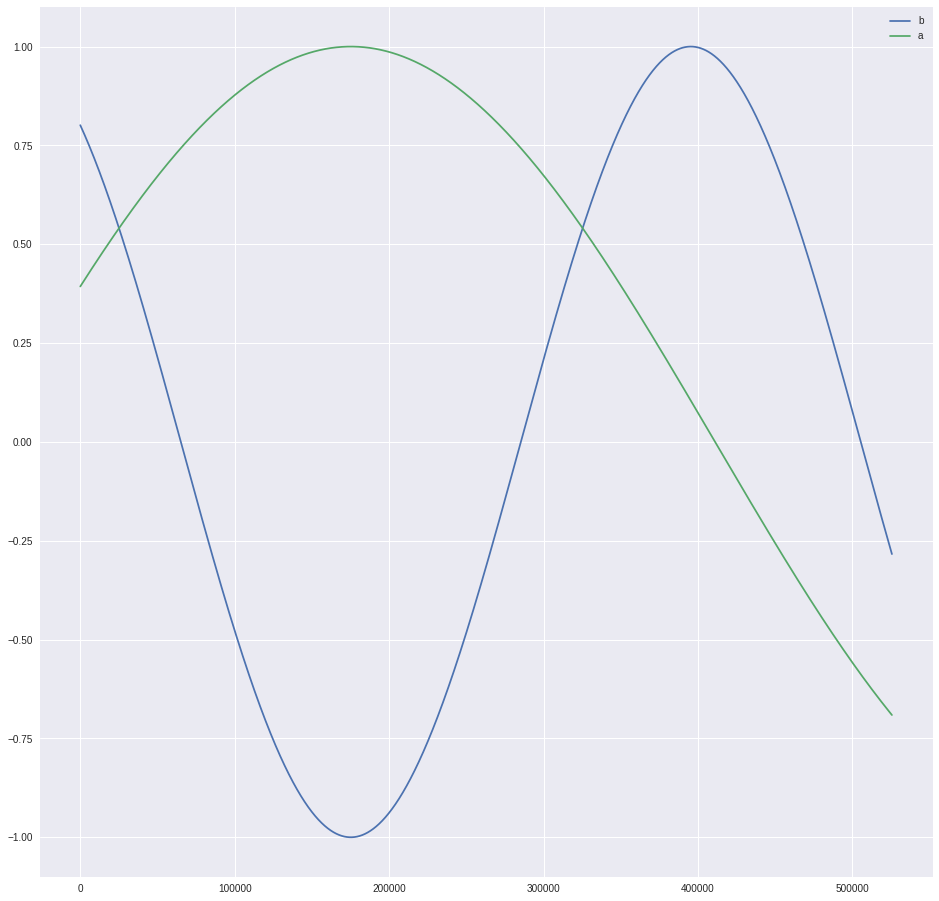

In [44]:
b = - np.cos(7.5 * (t_idx - (T - 1) / 3) / (T - 1))
a = np.cos(3.5 * (t_idx - (T - 1) / 3) / (T - 1))

f, ax = plt.subplots(1, 1, figsize=(16, 16))
ax.plot(b, label='b')
ax.plot(a, label='a')
ax.legend()

plt.show()

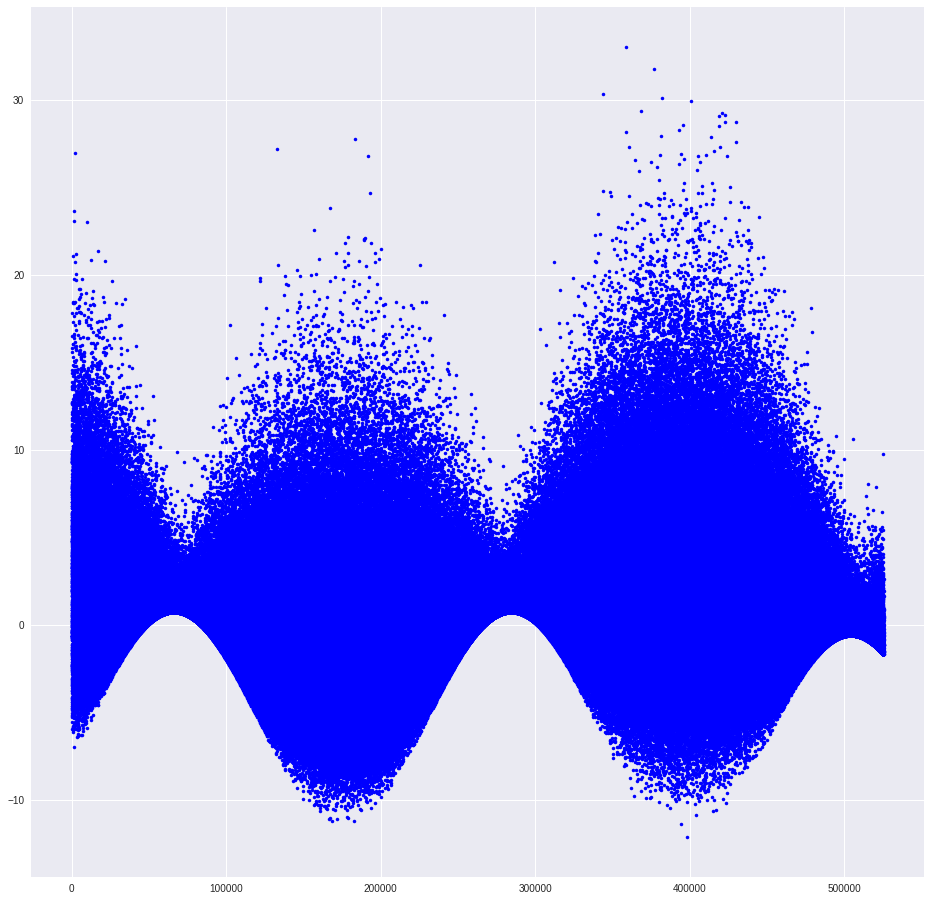

In [45]:
f, ax = plt.subplots(1, 1, figsize=(16, 16))
ax.plot(X ** 2 / 50 + X * b + a, '.b')

plt.show()

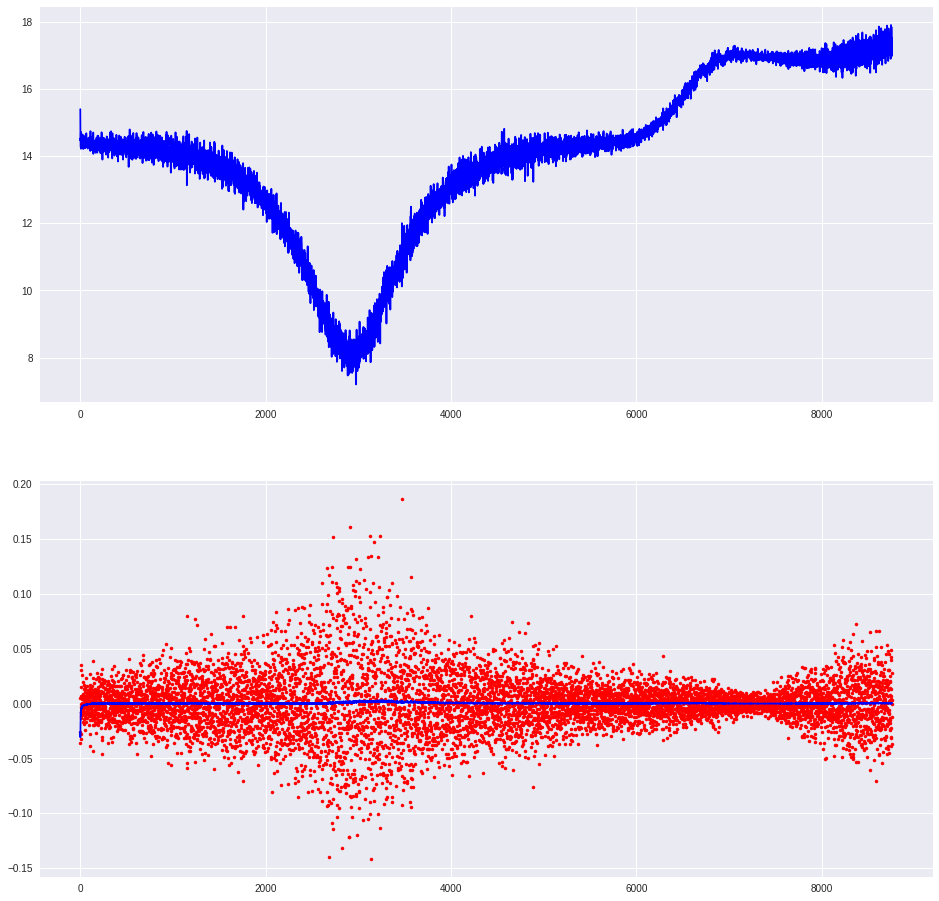

In [115]:
T = 365 * 24  # = 365d * 24H * 60M
t_idx = np.arange(T)

b = - np.cos(7.5 * (t_idx - (T - 1) / 3) / (T - 1))
a = np.cos(3.5 * (t_idx - (T - 1) / 3) / (T - 1))

b_1t = 0.8 * np.cos(7.5 * (t_idx - (T - 1) / 3) / (T - 1))
b_2t = 0.3 * np.cos(15. * (t_idx - (T - 1) / 3) / (T - 1))
a_1t = 0.7 * np.cos(3.5 * (t_idx - (T - 1) / 3) / (T - 1))
a_2t = - 0.2 * np.cos(9. * (t_idx - (T - 1) / 3) / (T - 1))

X = np.zeros([T])
s = 0.2
m = 0.3
e = np.random.randn(T) * s + m

X[0] = e[0]

for t in range(2, T):
    # X[t] = 0.3 * X[t - 1] - 0.2 * X[t - 2] - 2 * a[t] + b[t] * e[t] - 0.5 * b[t - 1] * e[t - 1] + 0.1 + 0.1 * e[t - 2]
    X[t] = b_2t[t] * X[t - 1] + b_2t[t] * X[t - 2] - 2 * a[t] + .5 + a_1t[t] * e[t] - b_2t[t - 1] * e[t - 1]
    

X = 2 * X + 15

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 16))
ax1.plot(X, "b-")
ax2.plot(X[1:] / X[:-1] - 1, 'r.')
ax2.plot(fy.sma(X[1:] / X[:-1] - 1, w=24 * 5), 'b-')

plt.show()

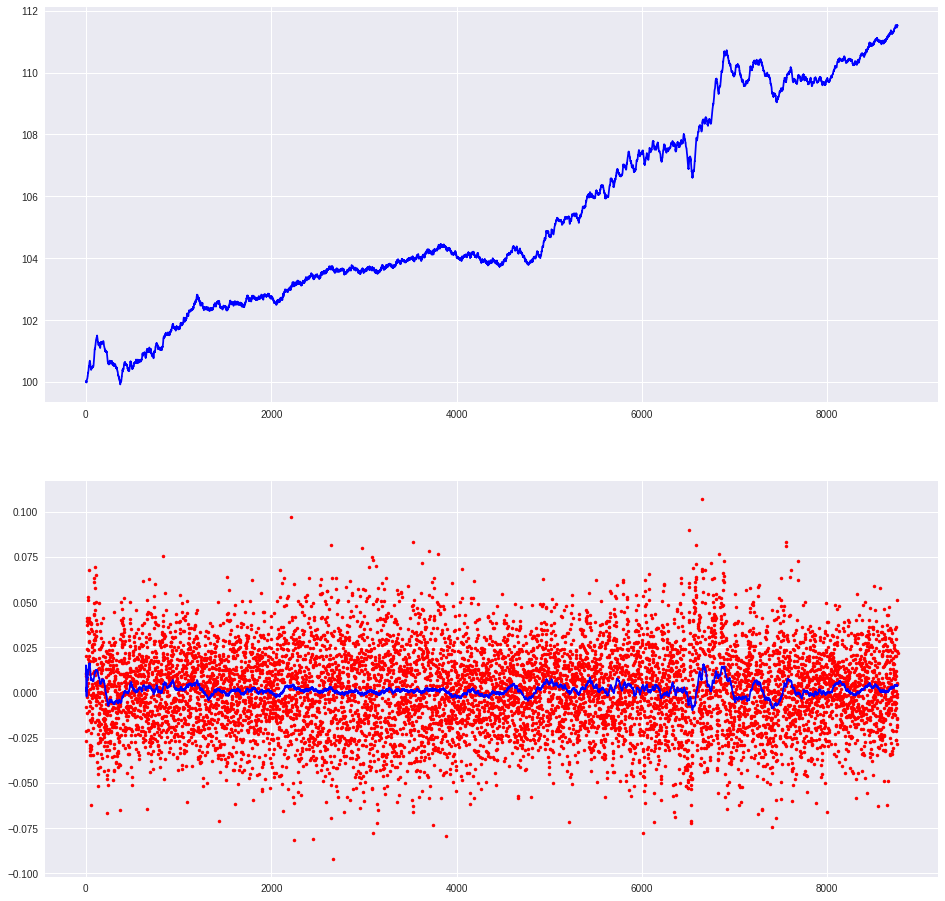

In [183]:
T = 365 * 24  # = 365d * 24H * 60M
t_idx = np.arange(T)

b = - .7 * np.cos(7.5 * (t_idx - (T - 1) / 3) / (T - 1))
a = .2 * np.cos(3.5 * (t_idx - (T - 1) / 3) / (T - 1))

X = np.zeros([T])
s = 0.02
m = 0.00
e = np.random.randn(T) * s + m

X[0] = 0.01 # e[0]
X[1] = 0.02

for t in range(2, T):
    # X[t] = 0.3 * X[t - 1] - 0.2 * X[t - 2] - 2 * a[t] + b[t] * e[t] - 0.5 * b[t - 1] * e[t - 1] + 0.1 + 0.1 * e[t - 2]
    # X[t] = b_2t[t] * X[t - 1] + b_2t[t] * X[t - 2] - 2 * a[t] + .5 + a_1t[t] * e[t] - b_2t[t - 1] * e[t - 1]
    X[t] = a[t] * X[t - 1] + b[t] * X[t - 2] + e[t] + 0.001

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 16))
ax1.plot(np.cumsum(X) + 100, "b-")
ax2.plot(X, 'r.')
ax2.plot(fy.sma(X, w=24 * 5), 'b-')

plt.show()

In [184]:
ret = X[1:] / X[:-1] - 1

In [194]:
y = ret[1:].copy().reshape([T - 2, 1]).astype(np.float32)
X = np.zeros([y.size, 10], dtype=np.float32)
X[:, 0] = ret[:-1]
X[1:, 1] = ret[:-2]
X[:, 2] = fy.sma(X[:, 0], w=6)
X[:, 3] = fy.sma(X[:, 0], w=12)
X[:, 4] = fy.sma(X[:, 0], w=24)
X[:, 5] = fy.sma(X[:, 0], w=48)
X[:, 6] = fy.sma(X[:, 0], w=72)
X[:, 7] = fy.sma(X[:, 0], w=24 * 7)
X[:, 8] = fy.sma(X[:, 0], w=24 * 14)
X[:, 9] = fy.sma(X[:, 0], w=24 * 30)

roll_mlp = fy.RollMultiLayerPerceptron(X, y, layers=[64])
roll_mlp

RollMultiLayerPerceptron(
  (layers): ModuleList(
    (0): Linear(in_features=10, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [195]:
criterion = torch.nn.L1Loss
optimizer = torch.optim.Adamax
lr = 0.0001

roll_mlp.set_optimizer(criterion, optimizer, lr=lr)

RollMultiLayerPerceptron(
  (layers): ModuleList(
    (0): Linear(in_features=10, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=1, bias=True)
  )
  (criterion): L1Loss()
)

<IPython.core.display.Javascript object>


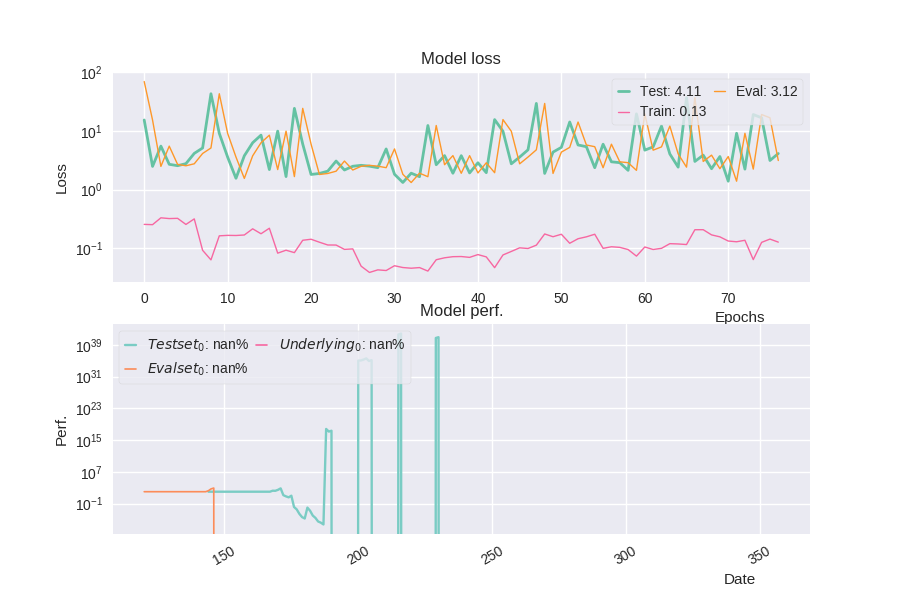

In [ ]:
%matplotlib notebook

roll_mlp.set_roll_period(24 * 7, 24, batch_size=64, epochs=1)

roll_mlp.run()

In [ ]:
y

In [189]:
ret

array([ 1.        , -0.54771494, -1.91047811, ...,  6.29882108,
       -0.20657207, -2.51700291])